In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Bread Composition.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.shape

(1599, 12)

In [5]:
# df['quality'] = pd.Categorical(df['quality'], ordered=True, categories=[3,4,5,6,7,8])

In [6]:
df.describe(include = 'all').style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
mean,8.31964,0.527821,0.270976,2.53881,0.0874665,15.8749,46.4678,0.996747,3.31111,0.658149,10.423,5.63602
std,1.7411,0.17906,0.194801,1.40993,0.0470653,10.4602,32.8953,0.00188733,0.154386,0.169507,1.06567,0.807569
min,4.6,0.12,0,0.9,0.012,1,6,0.99007,2.74,0.33,8.4,3
25%,7.1,0.39,0.09,1.9,0.07,7,22,0.9956,3.21,0.55,9.5,5
50%,7.9,0.52,0.26,2.2,0.079,14,38,0.99675,3.31,0.62,10.2,6
75%,9.2,0.64,0.42,2.6,0.09,21,62,0.997835,3.4,0.73,11.1,6
max,15.9,1.58,1,15.5,0.611,72,289,1.00369,4.01,2,14.9,8


In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

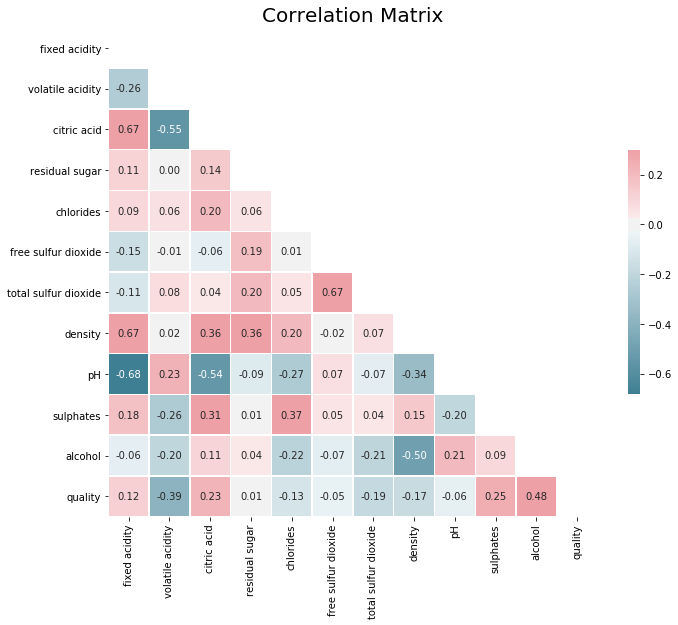

In [8]:
corr_matrix=df.corr(method='pearson')
corr_matrix.style.background_gradient()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# fig=plt.figure(figsize=(12,12))
# Draw the heatmap with the mask and correct aspect ratio
fig1 = sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')
ax.set_title('Correlation Matrix', fontsize = 20)
# swarm_plot = sns.swarmplot(...)
fig = fig1.get_figure()
fig.savefig("Corr_all.png")
plt.show()


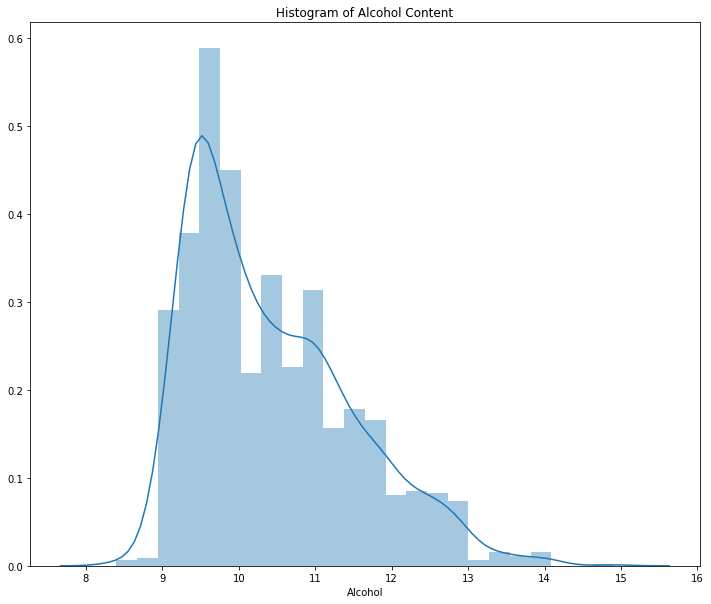

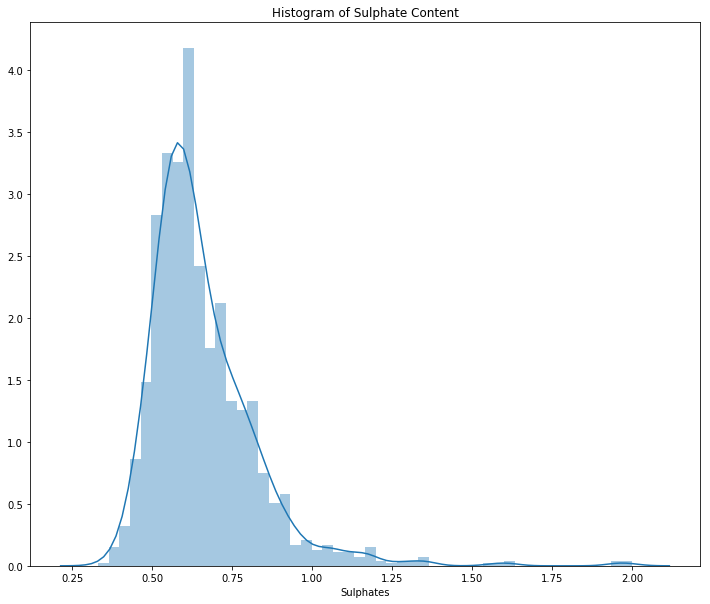

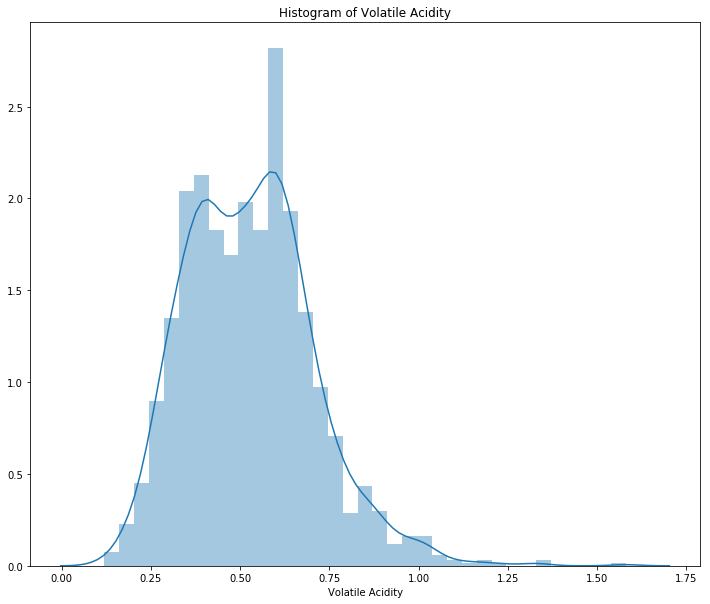

In [9]:
from scipy.stats import norm
#defining standard graph size
plt.rcParams["figure.figsize"]=(12,10)

# plt.subplot(2, 1, 1)
# sns.set(font_scale=2) 

# df.boxplot(column=['alcohol'], by='quality', figsize=(14, 10), ax=ax);
# ax.set_title('Alcohol');

plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1)
ax = plt.axes()
fig2 = sns.distplot(df['alcohol'], hist=True, kde = True, axlabel= 'Alcohol');
ax.set_title('Histogram of Alcohol Content');
fig = fig2.get_figure()
fig.savefig("Alcohol Content.png")
plt.show()

plt.figure(figsize=(12,10))
plt.subplot(3, 1, 2)
ax = plt.axes()
fig3 = sns.distplot(df['sulphates'], hist=True, kde = True, axlabel= 'Sulphates');
ax.set_title('Histogram of Sulphate Content');
fig = fig3.get_figure()
fig.savefig("Sulphate Content.png")
plt.show()


plt.figure(figsize=(12,10))
plt.subplot(3, 1, 3)
ax = plt.axes()
fig4 = sns.distplot(df['volatile acidity'], hist=True, kde = True, axlabel= 'Volatile Acidity');
ax.set_title('Histogram of Volatile Acidity');
fig = fig4.get_figure()
fig.savefig("Volatile Acidity.png")
plt.show()


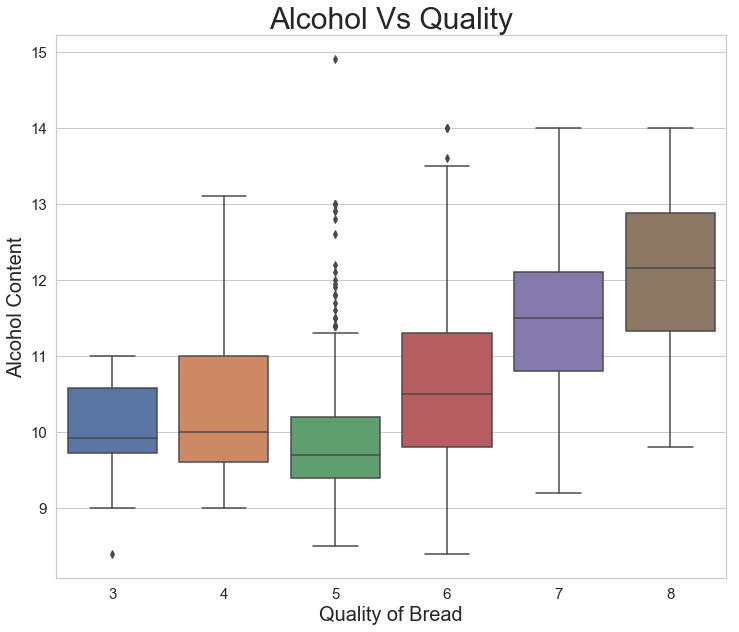

In [10]:
sns.set(style='whitegrid')
b = sns.boxplot(x = 'quality', y = 'alcohol', data = df)
b.axes.set_title("Alcohol Vs Quality",fontsize=30)
b.set_xlabel("Quality of Bread",fontsize=20)
b.set_ylabel("Alcohol Content",fontsize=20)
b.tick_params(labelsize=15)
# sns.plt.show()

In [11]:
# import statsmodels.api as sm
# import statsmodels.formula.api as ols
# from scipy import stats
# col_list = list(df.columns)
# for x in col_list:
#     k, p = stats.normaltest(df[x], nan_policy='omit', axis=0)
#     print("P-value for ", x, " = ", format(p))

# # f, p = stats.f_oneway()

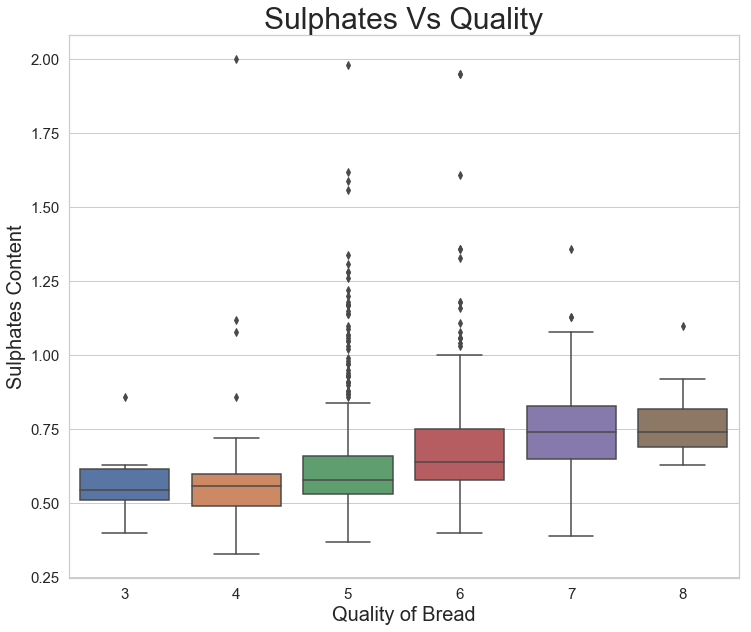

In [12]:
sns.set(style='whitegrid')
b = sns.boxplot(x = 'quality', y = 'sulphates', data = df)
b.axes.set_title("Sulphates Vs Quality",fontsize=30)
b.set_xlabel("Quality of Bread",fontsize=20)
b.set_ylabel("Sulphates Content",fontsize=20)
b.tick_params(labelsize=15)
# sns.plt.show()

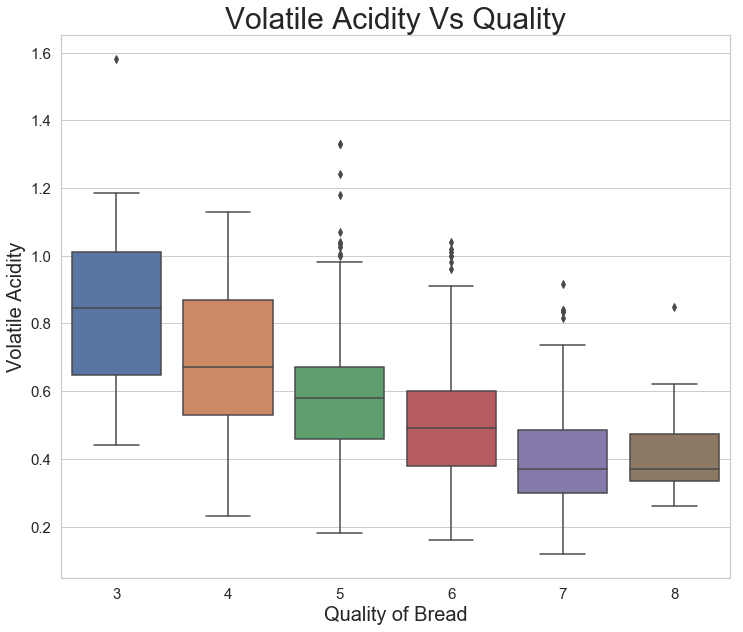

In [13]:
sns.set(style='whitegrid')
b = sns.boxplot(x = 'quality', y = 'volatile acidity', data = df)

b.axes.set_title("Volatile Acidity Vs Quality",fontsize=30)
b.set_xlabel("Quality of Bread",fontsize=20)
b.set_ylabel("Volatile Acidity",fontsize=20)
b.tick_params(labelsize=15)
# sns.plt.show()

In [14]:
dfa = pd.DataFrame()
dfa = df[['quality', 'sulphates', 'alcohol', 'volatile acidity']]

dfa['quality'] = np.where(dfa['quality'] == 3, 4, dfa['quality'])
dfa['quality'] = np.where(dfa['quality'] == 5, 6, dfa['quality'])
dfa['quality'] = np.where(dfa['quality'] == 7, 8, dfa['quality'])

dfa['Quality_Type'] = np.where(dfa['quality'] == 4, 'Low', np.where(dfa['quality'] == 6, 'Medium', 'Good'))


C:\Users\aasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\aasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\aasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [15]:
# Creating Different Dataset for Independent and dependent Variable
X = dfa.iloc[:,1:4]
Y = dfa['Quality_Type']

In [16]:
##############################################################################
     #################          Min Max SCALING         #################
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
MinMax_scaled_df = scaler.fit_transform(X)
MinMax_scaled_df = pd.DataFrame(MinMax_scaled_df, columns=['Sulphates', 'Alcohol', 'volatile acidity'])
MinMax_scaled_df.head()

,Sulphates,Alcohol,volatile acidity
0,0.137725,0.153846,0.397260
1,0.209581,0.215385,0.520548
2,0.191617,0.215385,0.438356
3,0.149701,0.215385,0.109589
4,0.137725,0.153846,0.397260


In [17]:
X = MinMax_scaled_df

### DECISION TREE CLASSIFICATION

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

##############################################################################
##################       IMPORT LIBRARIES AND PACKAGES      ##################

%pylab inline
import time, glob, pickle
import seaborn as sns
import pandas as pd
import sklearn as skl
import scipy.optimize as so
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.metrics import make_scorer, brier_score_loss, roc_auc_score
from sklearn import metrics

##############################################################################
#################          TRAINING & TEST DATASETS          #################

# Create stratified training and test splits

N_Folds       = 10 
RN_Seed  = 1234
cv = StratifiedKFold(n_splits= N_Folds )
Xo_train, Xo_test, y_train, y_test = train_test_split( X , Y , test_size=0.2, random_state= RN_Seed  , stratify=Y )

print("Predictors Test and Train size: ",Xo_test.shape,Xo_train.shape,
     "\nOutcomes Test and Train size: ",y_test.shape,y_train.shape)

Populating the interactive namespace from numpy and matplotlib
Predictors Test and Train size:  (320, 3) (1279, 3) 
Outcomes Test and Train size:  (320,) (1279,)


C:\Users\aasha\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
###############################################################################
###################        DECISION TREE CLASSIFIER        ####################

param_grid={'min_samples_split': range(2, 403, 10),
           'max_depth': range(1,50)}

tree_clf = DecisionTreeClassifier(random_state=RN_Seed)

tree_clf_CV = GridSearchCV( estimator= tree_clf, param_grid=param_grid, cv = cv, scoring='accuracy', n_jobs=4)

%time tree_clf_CV.fit(Xo_train, y_train)

Wall time: 46.1 s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'min_samples_split': range(2, 403, 10), 'max_depth': range(1, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [20]:
print(tree_clf_CV.best_params_, tree_clf_CV.best_score_)

{'max_depth': 4, 'min_samples_split': 32} 0.835027365129007


In [21]:
tree_clf = DecisionTreeClassifier(random_state=RN_Seed, max_depth=4, min_samples_split=32)
tree_clf.fit(Xo_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=32,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [22]:
feature_name = [ 'sulphates', 'alcohol', 'volatile acidity']
target_names = ['Low', 'Medium', 'Good']

In [23]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = ""
CHAPTER_ID = ""

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [24]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path("bread_class.dot"),
        feature_names=feature_name,
        class_names=target_names,
        rounded=True,
        filled=True
    )

In [25]:
######################  Using the model to predict Testing set  ########################

y_predict_dt = tree_clf.predict(Xo_test)



y_predict_prob_dt = tree_clf.predict_proba(Xo_test)
print("Prediction of Test Variable:",y_predict_dt)
y_predict_prob_df_dt = pd.DataFrame(y_predict_prob_dt)
y_predict_prob_df_dt.columns = target_names
# y_predict_prob_df_dt.columns = target_number
y_predict_prob_df_dt.head()

Prediction of Test Variable: ['Medium' 'Medium' 'Medium' 'Good' 'Medium' 'Good' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Good' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Good' 'Medium' 'Good'
 'Good' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Good' 'Medium'
 'Medium' 'Good' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Good' 'Medium' 'Medium' 'Medium' 'Good' 'Good' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Good' 'Medium' 'Medium' 'Medium' 'Good'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Low' 'Medium' 'Medium' 'Medi

,Low,Medium,Good
0,0.346939,0.020408,0.632653
1,0.006135,0.032720,0.961145
2,0.006135,0.032720,0.961145
3,0.642857,0.000000,0.357143
4,0.006135,0.032720,0.961145


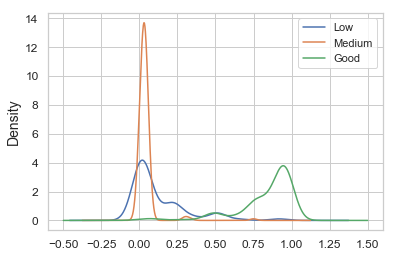

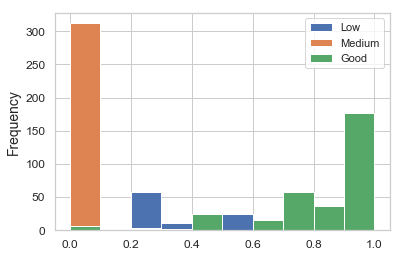

In [26]:
y_predict_prob_df_dt.plot(kind='density');
y_predict_prob_df_dt.plot(kind='hist');

In [27]:
Precision = {}
Recall = {}
Accuracy = {}

In [28]:
print(metrics.accuracy_score(y_test, y_predict_dt, normalize=True))
print(metrics.precision_score(y_test, y_predict_dt, average= 'micro'))
print(metrics.recall_score(y_test, y_predict_dt, average= 'micro'))
# print(metrics.roc_auc_score(y_test, y_predict, average='micro'))
print(metrics.classification_report(y_test, y_predict_dt))
print(metrics.confusion_matrix(y_test, y_predict_dt))

Precision["Decision Tree"] = metrics.precision_score(y_test, y_predict_dt, average= 'micro')
Recall["Decision Tree"] = metrics.recall_score(y_test, y_predict_dt, average= 'micro')
Accuracy["Decision Tree"] = metrics.accuracy_score(y_test, y_predict_dt, normalize=True)

0.828125
0.828125
0.828125
              precision    recall  f1-score   support

        Good       0.55      0.42      0.47        43
         Low       0.00      0.00      0.00        13
      Medium       0.87      0.94      0.90       264

   micro avg       0.83      0.83      0.83       320
   macro avg       0.47      0.45      0.46       320
weighted avg       0.79      0.83      0.81       320

[[ 18   0  25]
 [  0   0  13]
 [ 15   2 247]]


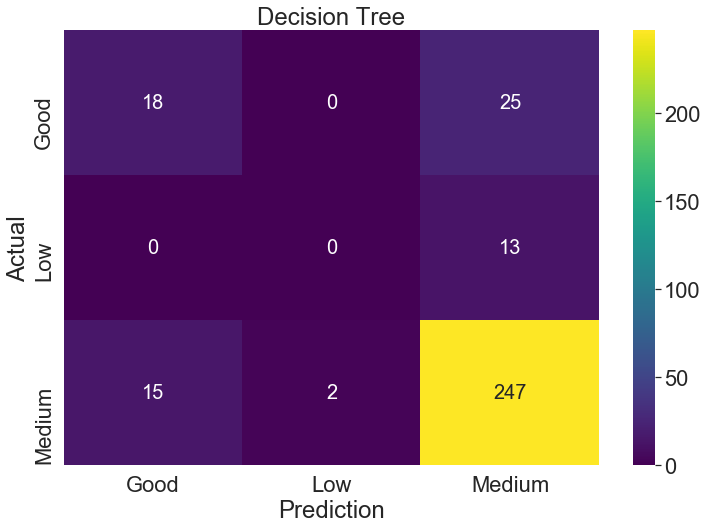

In [29]:
df_cfm_dt=pd.DataFrame(data=y_predict_dt,columns=["Prediction"])
df_cfm_dt["Actual"]=pd.DataFrame(data=y_test.values)
# df_cfm_dt['Actual'] = np.where(df_cfm_dt['Actual'] == 4, 'Low', np.where(df_cfm_dt['Actual'] == 6, 'Medium', 'Good'))
# df_cfm_dt['Prediction'] = np.where(df_cfm_dt['Prediction'] == 4, 'Low', np.where(df_cfm_dt['Prediction'] == 6, 'Medium', 'Good'))

confusion_matrix_dt=pd.crosstab(df_cfm_dt["Actual"],df_cfm_dt["Prediction"])
plt.figure(figsize=(12,8))
sns.set(font_scale=2) 
ax = plt.axes()
sns.heatmap(confusion_matrix_dt,annot=True,cmap="viridis",annot_kws={"size": 20}, ax = ax,  fmt='g')
ax.set_title('Decision Tree')
plt.savefig('DT.png')

### Random Forest


In [30]:
from sklearn.ensemble import RandomForestClassifier

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc = RandomForestClassifier(random_state= RN_Seed)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= cv, scoring='accuracy', n_jobs=4)
%time CV_rfc.fit(Xo_train, y_train)

Wall time: 1min 27s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [31]:
print(CV_rfc.best_params_, CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500} 0.8459734167318217


In [32]:
rfc1 = RandomForestClassifier(random_state= RN_Seed, max_depth=8, max_features='auto', criterion='entropy', n_estimators=500)

In [33]:
rfc1.fit(Xo_train, y_train);
y_predict_rfc = rfc1.predict(Xo_test)

In [34]:
y_predict_prob_rfc = rfc1.predict_proba(Xo_test)

print("Prediction of Test Variable:",y_predict_rfc)

y_predict_prob_df_rfc = pd.DataFrame(y_predict_prob_rfc)

y_predict_prob_df_rfc.columns = target_names

y_predict_prob_df_rfc.head()

Prediction of Test Variable: ['Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Good' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Good' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Good' 'Medium' 'Good'
 'Good' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Good' 'Medium' 'Medium' 'Medium' 'Good' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Good' 'Medium' 'Medium' 'Medium' 'Good'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Low' 'Medium' 'Mediu

,Low,Medium,Good
0,0.342072,0.007826,0.650102
1,0.001617,0.058781,0.939603
2,0.003021,0.017005,0.979974
3,0.451116,0.000000,0.548884
4,0.014313,0.009111,0.976576


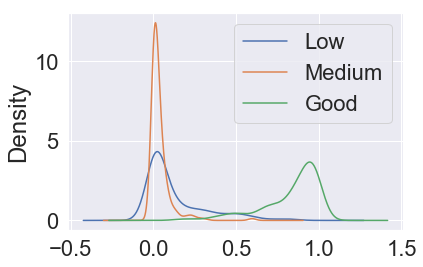

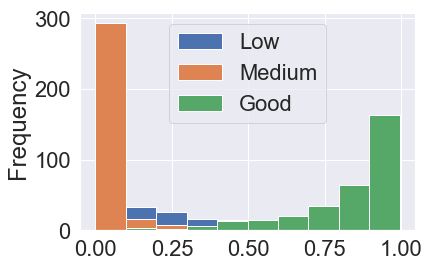

In [35]:
fig5 = y_predict_prob_df_rfc.plot(kind='density');
fig = fig5.get_figure()
fig.savefig("RF_Prob.png")
plt.show()
# xlim(0,1);
y_predict_prob_df_rfc.plot(kind='hist');

In [36]:
print(metrics.accuracy_score(y_test, y_predict_rfc, normalize=True ))
print(metrics.precision_score(y_test, y_predict_rfc, average= 'micro'))
print(metrics.recall_score(y_test, y_predict_rfc, average= 'micro'))
# print(metrics.roc_auc_score(y_test, y_predict, average='micro'))
print(metrics.classification_report(y_test, y_predict_rfc))
print(metrics.confusion_matrix(y_test, y_predict_rfc))

Precision["Random Forest"] = metrics.precision_score(y_test, y_predict_rfc, average= 'micro')
Recall["Random Forest"] = metrics.recall_score(y_test, y_predict_rfc, average= 'micro')
Accuracy["Random Forest"] = metrics.accuracy_score(y_test, y_predict_rfc, normalize=True )

0.85
0.85
0.85
              precision    recall  f1-score   support

        Good       0.73      0.37      0.49        43
         Low       0.00      0.00      0.00        13
      Medium       0.86      0.97      0.91       264

   micro avg       0.85      0.85      0.85       320
   macro avg       0.53      0.45      0.47       320
weighted avg       0.81      0.85      0.82       320

[[ 16   0  27]
 [  0   0  13]
 [  6   2 256]]


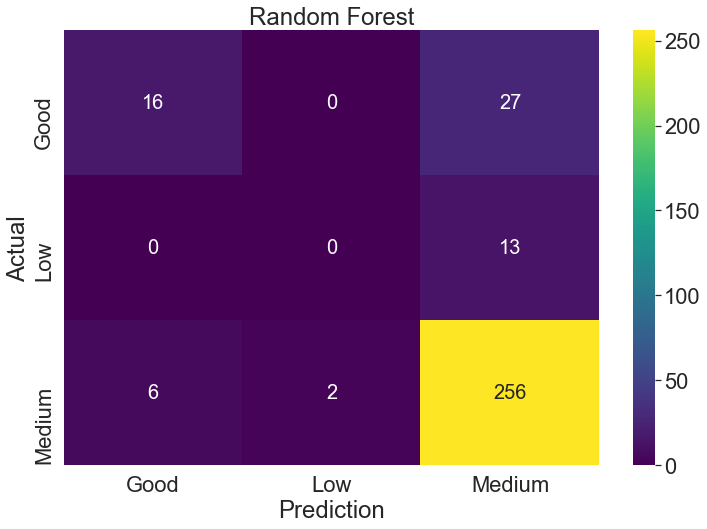

In [37]:
df_cfm_rfc=pd.DataFrame(data=y_predict_rfc,columns=["Prediction"])
df_cfm_rfc["Actual"]=pd.DataFrame(data=y_test.values)
# df_cfm_rfc['Actual'] = np.where(df_cfm_rfc['Actual'] == 1, 'Yes', np.where(df_cfm_rfc['Actual'] == 2, 'Maybe', 'No'))
# df_cfm_rfc['Prediction'] = np.where(df_cfm_rfc['Prediction'] == 1, 'Yes', np.where(df_cfm_rfc['Prediction'] == 2, 'Maybe', 'No'))

confusion_matrix_rfc=pd.crosstab(df_cfm_rfc["Actual"],df_cfm_rfc["Prediction"])
plt.figure(figsize=(12,8))
sns.set(font_scale=2) 
ax = plt.axes()
sns.heatmap(confusion_matrix_rfc,annot=True,cmap="viridis",annot_kws={"size": 20}, ax = ax, fmt = 'g')
ax.set_title('Random Forest')
plt.savefig('RF.png')

# Support Vector Machine Classification

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

In [39]:
param_grid = {
    'C' : linspace(0.5,2,15),
    'kernel' : ['linear', 'poly', 'rbf'],
    'degree' : range(1,5), 
    'coef0' : range(1,3),
}

svc = SVC(probability=True)
SVC_grid = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv , scoring='accuracy', n_jobs=4  )
%time SVC_grid.fit(Xo_train, y_train)

Wall time: 1min 18s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'C': array([0.5    , 0.60714, 0.71429, 0.82143, 0.92857, 1.03571, 1.14286,
       1.25   , 1.35714, 1.46429, 1.57143, 1.67857, 1.78571, 1.89286,
       2.     ]), 'kernel': ['linear', 'poly', 'rbf'], 'degree': range(1, 5), 'coef0': range(1, 3)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
print(SVC_grid.best_params_, SVC_grid.best_score_)

{'C': 0.5, 'coef0': 1, 'degree': 1, 'kernel': 'linear'} 0.8248631743549648


In [41]:
# Assign the tuned model
SVC_B = SVC_grid.best_estimator_
SVC_B

SVC(C=0.5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
y_pred_svc = SVC_B.predict(Xo_test)
y_pred_svc_prob = SVC_B.predict_proba(Xo_test)


print("Prediction of Test Variable:",y_pred_svc)

y_predict_prob_df_svc = pd.DataFrame(y_pred_svc_prob)

y_predict_prob_df_svc.head()

Prediction of Test Variable: ['Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Me

,0,1,2
0,0.183425,0.018402,0.798173
1,0.059744,0.050057,0.890199
2,0.066578,0.054145,0.879278
3,0.103946,0.019960,0.876093
4,0.074412,0.052405,0.873183


In [43]:
print(metrics.accuracy_score(y_test, y_pred_svc, normalize=True ))
print(metrics.precision_score(y_test, y_pred_svc, average= 'micro'))
print(metrics.recall_score(y_test, y_pred_svc, average= 'micro'))
# print(metrics.roc_auc_score(y_test, y_predict, average='micro'))
print(metrics.classification_report(y_test, y_pred_svc))
print(metrics.confusion_matrix(y_test, y_pred_svc))

Precision["SVC"] = metrics.precision_score(y_test, y_pred_svc, average= 'micro')
Recall["SVC"] = metrics.recall_score(y_test, y_pred_svc, average= 'micro')
Accuracy["SVC"] = metrics.accuracy_score(y_test, y_pred_svc, normalize=True )

0.825
0.825
0.825
              precision    recall  f1-score   support

        Good       0.00      0.00      0.00        43
         Low       0.00      0.00      0.00        13
      Medium       0.82      1.00      0.90       264

   micro avg       0.82      0.82      0.82       320
   macro avg       0.27      0.33      0.30       320
weighted avg       0.68      0.82      0.75       320

[[  0   0  43]
 [  0   0  13]
 [  0   0 264]]


C:\Users\aasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


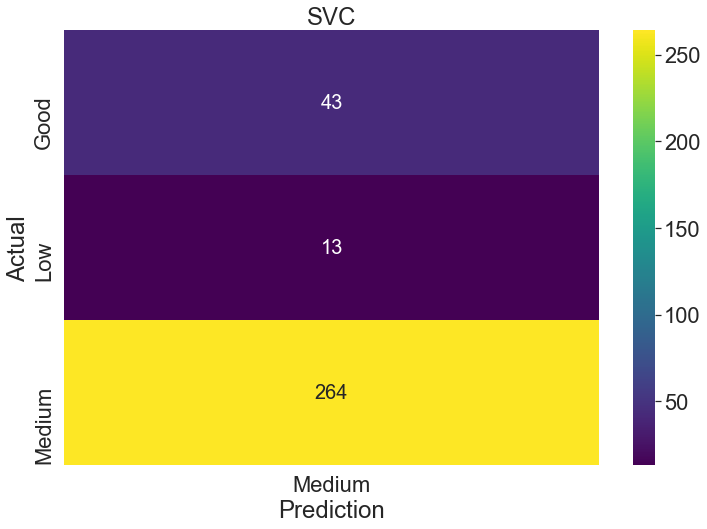

In [44]:
df_cfm_svc=pd.DataFrame(data=y_pred_svc,columns=["Prediction"])
df_cfm_svc["Actual"]=pd.DataFrame(data=y_test.values)
# df_cfm_rfc['Actual'] = np.where(df_cfm_rfc['Actual'] == 1, 'Yes', np.where(df_cfm_rfc['Actual'] == 2, 'Maybe', 'No'))
# df_cfm_rfc['Prediction'] = np.where(df_cfm_rfc['Prediction'] == 1, 'Yes', np.where(df_cfm_rfc['Prediction'] == 2, 'Maybe', 'No'))

confusion_matrix_svc=pd.crosstab(df_cfm_svc["Actual"],df_cfm_svc["Prediction"])
plt.figure(figsize=(12,8))
sns.set(font_scale=2) 
ax = plt.axes()
sns.heatmap(confusion_matrix_svc,annot=True,cmap="viridis",annot_kws={"size": 20}, ax = ax, fmt = 'g')
ax.set_title('SVC')
plt.savefig('SVC.png')

In [45]:
models = ["Decision Tree","Random Forest", "Support Vector",]

perf=pd.DataFrame({"Model":models})
perf["Precision"]=Precision.values()
perf["Recall"]=Recall.values()
perf["Accuracy"]=Accuracy.values()
perf.round(2)

,Model,Precision,Recall,Accuracy
0,Decision Tree,0.83,0.83,0.83
1,Random Forest,0.85,0.85,0.85
2,Support Vector,0.82,0.82,0.82


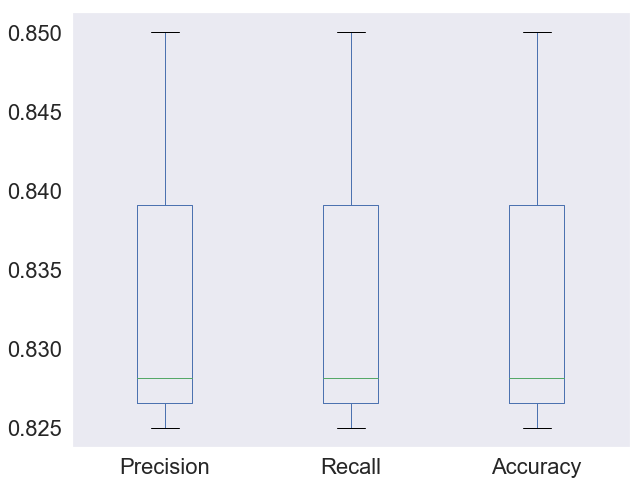

In [46]:
perf.boxplot(figsize=(10,8),grid=False)
plt.savefig('Boxplot.png')

# Sensitivity Analysis

In [47]:
models=["Random Forest"]
rf_accuracy=[]
split_ratio=[]

for i in range(1,99):
    ##Defining split size
    a=0.01*i
    split_ratio.append(a)
    #Splitting the data
    Xo_train, Xo_test, y_train, y_test = train_test_split( X , Y , test_size=a, random_state= RN_Seed  , stratify=Y )
    #making the RF model
    rfc1_sv = RandomForestClassifier(random_state= RN_Seed, max_depth=8, max_features='auto', criterion='entropy', n_estimators=500);
    rfc1_sv.fit(Xo_train, y_train);
    #Predicting the test value
    y_predict_rfc = rfc1_sv.predict(Xo_test)
    rf_accuracy.append(metrics.accuracy_score(y_test, y_predict_rfc, normalize=True ))

In [48]:
df_results=pd.DataFrame()
df_results['Split_Ratio']=split_ratio
df_results['RF_accuracy']=rf_accuracy

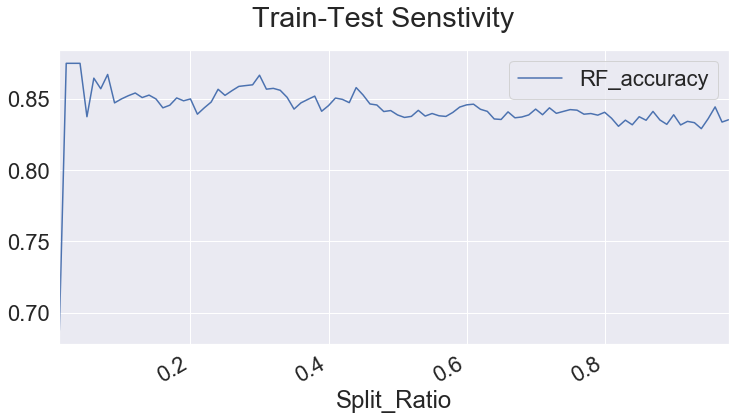

In [49]:
df_results.plot(x="Split_Ratio",y=['RF_accuracy'],figsize = (12,6),
                sharex=True,title = 'Train-Test Senstivity',subplots=True);
plt.savefig('ses.png')
# plt.legend();

In [50]:
df_results[df_results["RF_accuracy"]==df_results.RF_accuracy.max()]

,Split_Ratio,RF_accuracy
1,0.02,0.875
2,0.03,0.875
3,0.04,0.875


In [51]:
col_list=list(Xo_test.columns.values)
val_dict={}

for c in col_list:
    val_dict[c]=list(np.random.uniform(0,1,10))


df_random =pd.DataFrame(val_dict)
Y_rand_pred = pd.DataFrame(rfc1.predict(df_random),columns=["Bread Quality"])
Y_rand_pred["Bread Quality"].value_counts()

Medium    9
Good      1
Name: Bread Quality, dtype: int64